# Plot Board Extraction Training Data

View a grid of `n` training images. This notebook is useful for visually evaluating the current image augmentation settings of the board extraction training job.

In [13]:
import training.train_board_extractor as tr
from sklearn.model_selection import train_test_split
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import math

In [14]:
images, masks = tr.chessboards(asa=tr.matrix())
img_train, _, mask_train, _ = train_test_split(images, masks)

In [37]:
n = 104

N_train = len(img_train)
training_generator = tr.get_training_generator(img_train, mask_train, batch_size=n)
batch = list(next(training_generator))[0]

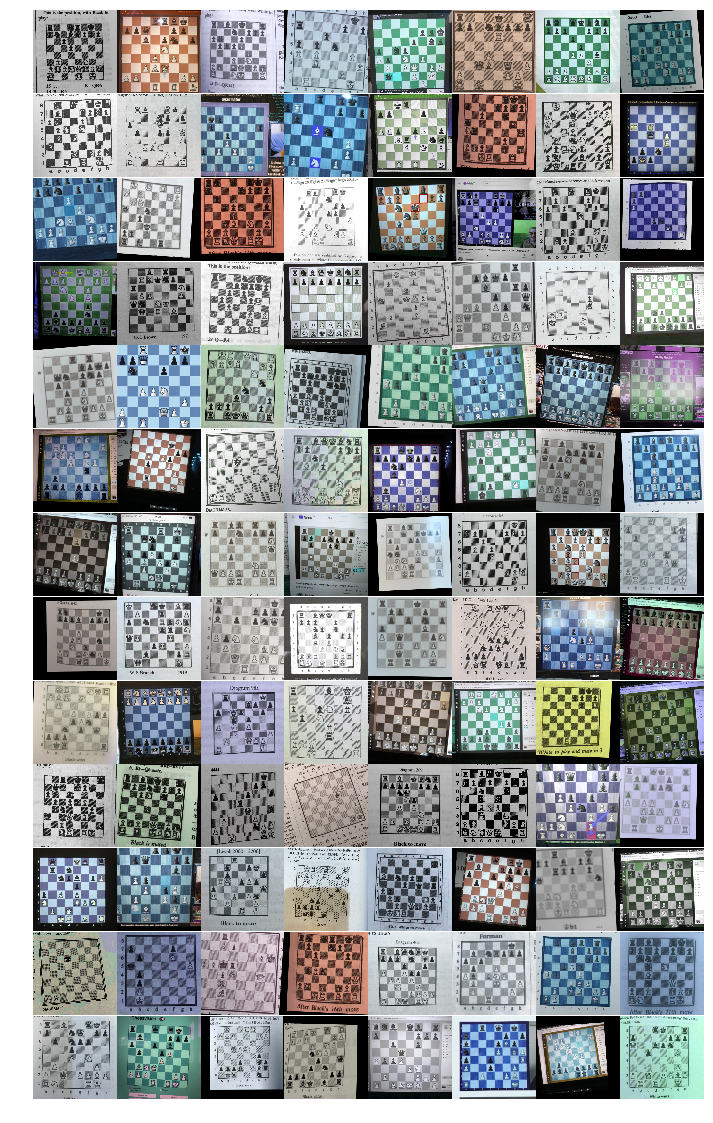

In [40]:

cols = 8
rows = math.ceil(n / cols)

fig = plt.figure(1, figsize=(12, 40)) #width, height in inches.

grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(rows, cols),
                 axes_pad=0.01,  # pad between axes in inch.
                 share_all=True,
                 label_mode=None
                 )
for i in range(rows):
    for j in range(cols):
        ind = i*cols + j
        if ind < n:
            img = batch[ind]
            ax = grid[ind]
            ax.imshow(img)
            ax.axis("off")

plt.show()